C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<ErrorbarContainer object of 3 artists>

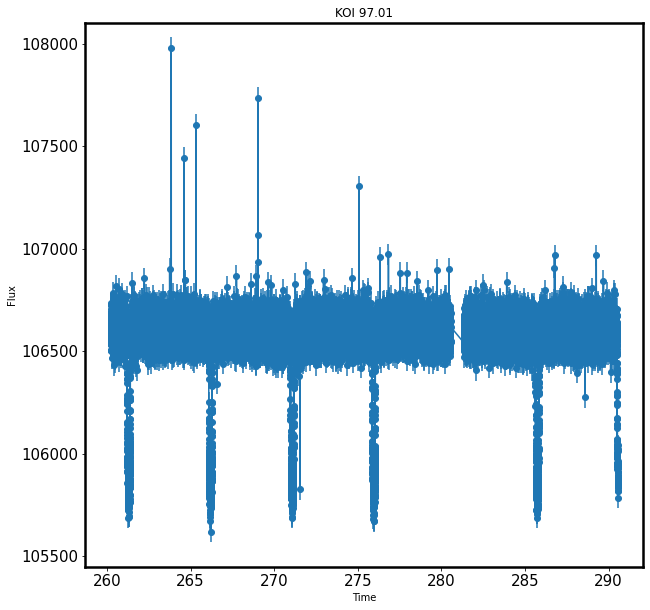

In [16]:
import numpy as np
import lightkurve as lk
%matplotlib inline
import matplotlib.pyplot as plt

lcs = lk.search_lightcurve("KOI 97.01", mission="Kepler", cadence="short").download_all()
time = lcs[0].time.value # get the time of each observation
flux = np.array(lcs[0].flux.value.data) # get the flux
flux_err = np.array(lcs[0].flux_err.value.data) # get the error in the flux

import matplotlib.pyplot as plt

figure, axis = plt.subplots(figsize=(10,10))
axis.scatter(lcs[0].time.value, np.array(lcs[0].flux.value.data))
x = lcs[0].time.value
y = lcs[0].flux.value.data


### Add axis labels
axis.set_xlabel("Time") # Add axis labels. you can use the fontsize= keyword to change the font size.
axis.set_ylabel("Flux")

### Add title
axis.set_title("KOI 97.01") # Add a title.

# Make plot look nice
axis_border_width = 2.5
fontsize_axis_labels = 15
axis.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)

axis.spines['top'].set_linewidth(axis_border_width)
axis.spines['left'].set_linewidth(axis_border_width)
axis.spines['right'].set_linewidth(axis_border_width)
axis.spines['bottom'].set_linewidth(axis_border_width)

plt.errorbar(x, y, np.array(lcs[0].flux_err.value.data))

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

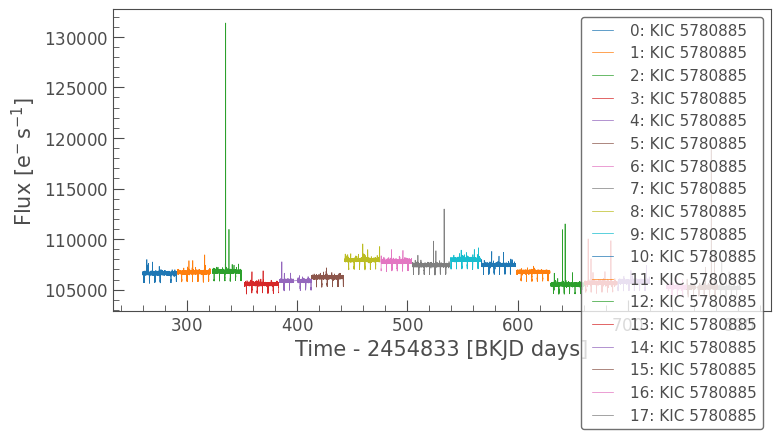

In [17]:
import numpy as np
search_result = lk.search_lightcurve("KOI 97.01", mission="Kepler", cadence="short")
#time = lcs[0].time.value # get the time of each observation
#flux = np.array(lcs[0].flux.value.data) # get the flux
#flux_err = np.array(lcs[0].flux_err.value.data) # get the error in the flux
lc_collection = search_result.download_all()
lc_collection.plot()

In [18]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 03,2009,Kepler,60,kplr005780885,0.0
1,Kepler Quarter 03,2009,Kepler,60,kplr005780885,0.0
2,Kepler Quarter 03,2009,Kepler,60,kplr005780885,0.0
3,Kepler Quarter 04,2010,Kepler,60,kplr005780885,0.0
4,Kepler Quarter 04,2010,Kepler,60,kplr005780885,0.0
5,Kepler Quarter 04,2010,Kepler,60,kplr005780885,0.0
6,Kepler Quarter 05,2010,Kepler,60,kplr005780885,0.0
7,Kepler Quarter 05,2010,Kepler,60,kplr005780885,0.0
8,Kepler Quarter 05,2010,Kepler,60,kplr005780885,0.0


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

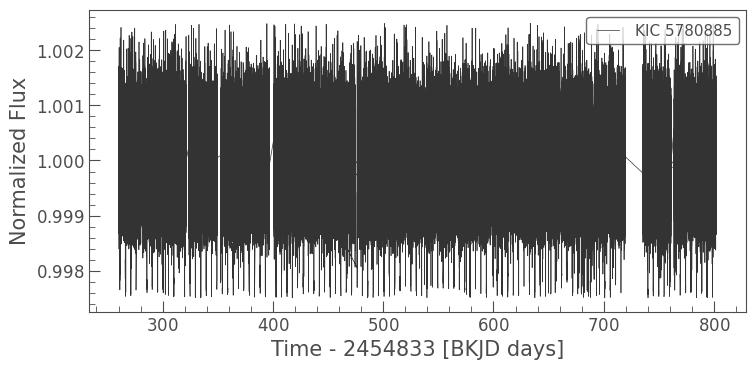

In [19]:
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

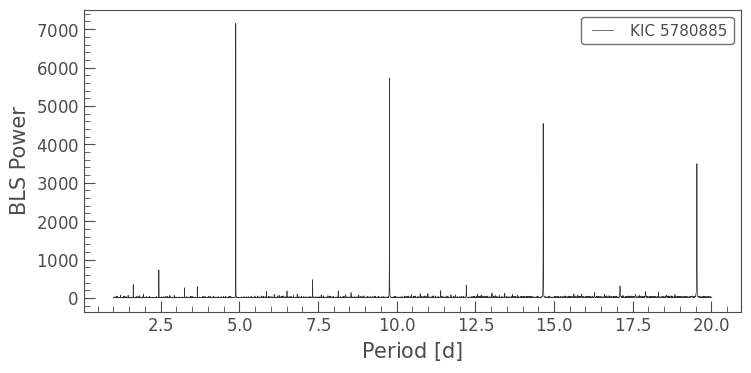

In [21]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

In [22]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 4.88588859 d>

(-5.0, 5.0)

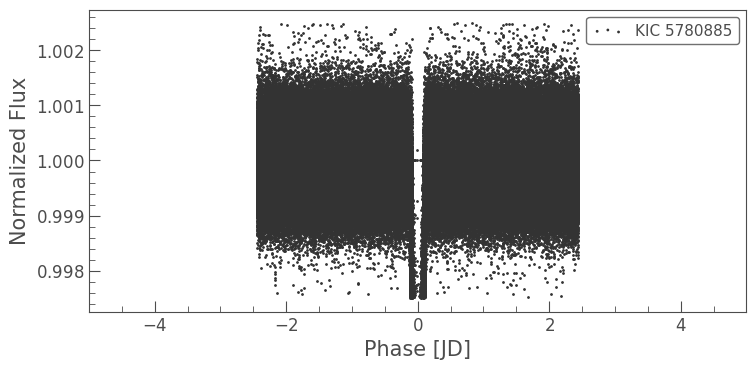

In [23]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5)

In [24]:
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

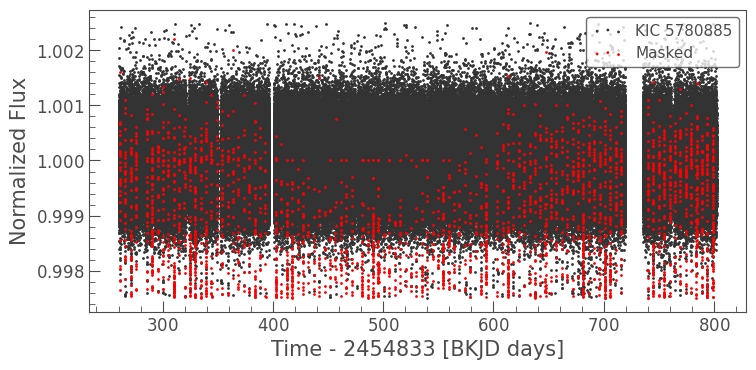

In [25]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter()
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked')


In [26]:
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

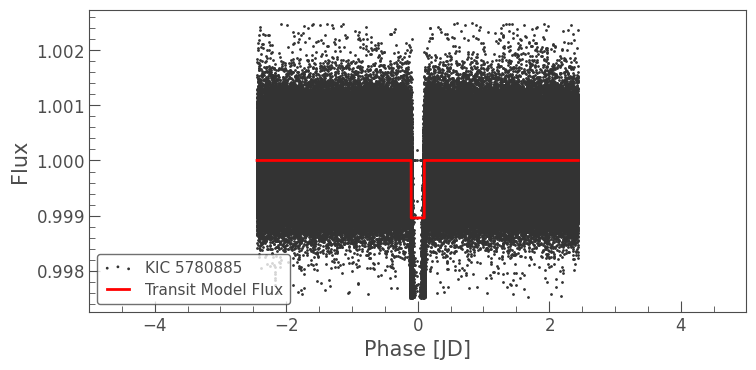

In [27]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);

In [28]:
# PROBLEM 2

def rect_int(f, a, b, N):
    """rectangle rule integration.
         f: the function f(x) to be integrated.
         a and b: lower and upper integration limits
         N: the number of integration steps"""
    h = (b - a) / N  #rectangle width
    result = 0
    for i in np.arange(N):
        x       = a + i * h
        result += f(x)*h
    return result

In [29]:
def delta(p, r, z):
    """returns the value of the delta function (equation 2),
    protecting against obvious fault."""
    if (r >= z + p) or (r <= z - p):
        return 0
    elif (r + z <= p):
        return 1
    else:  #all other cases
        if (z != 0) and (r!=0): #prevent div by zero errors
            argument = (z*z - p*p + r*r) / (2.0*z*r)
        else:
            print('Either z or r vanished. z =',z,'; and r =',r,'.')
        return (1.0/np.pi) * np.arccos(argument)

In [30]:
def delta_arr(p, r, z):
    "returns delta for all values of an array r, with scalars p & z"
    
    #at the ends of Simpson's rule, scalar values are fed in
    if np.isscalar(r):
        nr = 1
        r  = np.array([r])
    else:
        nr = len(r)
        
    result = np.zeros(nr) - 99                        #mark unmodified elements
    
    #where returns an array of indices satisfying the condition
    result[ np.where(r + z <= p)]                                              = 1.0

    #two conditions tested, and concatenated inside a list
    result[np.concatenate((np.where(r >= z + p)[0], np.where(r <= z - p)[0]))] = 0.0  
    
    # zero protect the division by adding a very small number to it
    eps = 1e-14
    
    #fill everything else; implicit line continuation within parentheses used here.
    ind = np.where(result == -99)[0]
    result[ind] = np.arccos((z*z - p*p + r[ind]**2) / (2.0 * z * r[ind] + eps)) / np.pi
    
    return result

In [31]:
def limb_dark(r):
    """stub function for the limb darkening"""
    if np.isscalar(r):                   #check whether r is a scalar or an arry
        return 1 - (1 - r**2)**1/2                    #no limb darkening
    else:
        return np.zeros(len(r)) + 1   #array rather than scalar

In [32]:
def flux(p,z,int_func,limb_func, N):
    """return the value of the flux, using equation 1. p & z are the 
    parameters, int_func is the integration routine, limb_func is the 
    chosen limb darkening profile, and N is the number of integration 
    steps."""
    
    # integrand for the numerator
    def numerator(r, p = p, z = z):  #default parameters allow passing data but don't require it
        return limb_func(r) * (1.0 - delta(p, r, z)) * 2.0 * r
    
    # and for the denominator
    def denominator (r):
        return limb_func(r) * 2.0 * r
    
    #now do the integrations
    lower  = 0.0
    upper  = 1.0
    
    top    = int_func(numerator,   lower, upper, N)
    bottom = int_func(denominator, lower, upper, N)
        
    return top/bottom

In [33]:
def flux_arr (p, z, int_func, limb_func, N):
    """use the array versions of the integrators"""
    
        # integrand for the numerator
    def numerator(r, p = p, z = z):  #default parameters allow passing data but don't require it
        return limb_func(r) * (1.0 - delta_arr(p, r, z)) * 2.0 * r
    
    # and for the denominator
    def denominator (r):
        return limb_func(r) * 2.0 * r

    lower = 0.0
    upper = 1.0
    r = np.arange(lower, upper, (upper - lower)/N)
    
    top = int_func(numerator,   r)
    bot = int_func(denominator, r)
    
    return top/bot

In [34]:
def kappa0(p, z):
    return np.arccos((p**2 + z**2 - 1)/(2*p*z))

def kappa1(p, z):
    return np.arccos((1 - p**2 + z**2)/(2*z))

def lambd(p, z):
    if 1 + p < z:
        return 0
    if z <= 1 - p:
        return p**2
    if z <= p - 1:
        return 1
    arg = (4*z**2 - (1 + z**2 - p**2)**2)/4
    if arg >= 0:
        return (kappa0(p, z)*p**2 + kappa1(p, z) - np.sqrt(arg))/np.pi
    else:
        return 0

def FluxRatio(p, z):
    """
    Compute the ratio of obscured/unobscured flux for a planet transit.
    
    Arguments:
       p - ratio of planet radius to stellar radius
       z - distance between star and planet divided by stellar radius
    Returns: 
       FluxRatio - ratio of obscured to unobscured stellar flux

    """
    return 1 - lambd(p, abs(z))

In [35]:
p = 0.2
z = 0.9
f_true = FluxRatio(p,z)  #analytic estimate
print('N,    f_int,    f_true,     relative error')
for i in range(1,5):
    f_int = flux(p, z, rect_int, limb_dark, 10**i)  #integrator estimate
    print(10**i, f_int, f_true, abs(f_int - f_true)/f_true)

N,    f_int,    f_true,     relative error
10 0.9692165291773474 0.9684170049114548 0.0008255991601114899
100 0.963263054664084 0.9684170049114548 0.005322036086966476
1000 0.9629304821158389 0.9684170049114548 0.005665454827610704
10000 0.9629028450133914 0.9684170049114548 0.005693993259202982


In [36]:
# PROBLEM 3
# #utilizing root finders described determine the value of T eff for a radius of d = 0.5 AU

### Calculate effective insolation values (t_eff) for Habitable Zones. Kopparapu et al. (2014)

############################
# Seff values
############################


# Solar Effective Temperature [K]
from numpy import sign


teffsun = 5780

__all__=['seffi','seffo']


def s_effi(teff):
    """Calculate effective insolation (S_eff) following
    Kopparapu et al. (2014): Ruaway Greenhouse limit.
    Parameters:
    -----------
    teff...   [K] effective stellar temperature
    Returns:
    -------
    s_inner... [] S_eff for the inner Habitable Zone border
    """
    tstar = teff-teffsun
    tstar2 = tstar*tstar
    tstar3 = tstar2*tstar
    tstar4 = tstar3*tstar

    s_eff0 = 1.107
    a = 1.332e-4
    b = 1.58e-8
    c = -8.308e-12
    d = -1.931e-15

    s_inner = s_eff0+a*tstar + b*tstar2 + c*tstar3+d*tstar4
    d = ((teffsun/5780) / s_inner)
    return s_inner

def s_effo(teff):
    """Calculate effective insolation (S_eff) following
    Kopparapu et al. (2014) Maximum Greenhouse limit.
    Parameters:
    -----------
    t_eff...   [K] effective stellar temperature
    Returns:
    -------
    s_outer... S_eff for the inner Habitable Zone border
    """
    tstar = teff-teffsun
    tstar2 = tstar*tstar
    tstar3 = tstar2*tstar
    tstar4 = tstar3*tstar

    # Kopparapu et al 2014 Maximum Greenhouse
    s_eff0 = 0.356
    a = 6.171e-5
    b = 1.698e-9
    c = -3.198e-12
    d = -5.575e-16
    s_outer = s_eff0 + a*tstar + b*tstar2 + c*tstar3+d*tstar4
    return s_outer






In [37]:
# Using the bisection method

def bisection(f, lower, upper, max_iters=50, tolerance=1e-5):
    
 
    steps_taken = 0
 
    while steps_taken < max_iters:
        m = (lower + upper) / 2.0
 
        if m == 0 or abs(upper-lower) < tolerance:             
            return m, steps_taken                 
        if f(m) > 0:
            upper = m
    else:
        lower = m
 
        steps_taken += 1
 
    final_estimate = (lower + upper) / 2.0
    return final_estimate, steps_taken
 
f = s_effo
 
root, steps = bisection(f, 1, 8)
print ("root is:", root)
print ("steps taken:", steps)

root is: 1.0000033378601074
steps taken: 0
